##Code to find the eigen values of k-toeplitz matrices using chebyshev approximation 

In [1]:
#Importing required libraries
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import cmath
import warnings
warnings.filterwarnings("ignore")

In [2]:
def k_toeplitz_matrix(diag_k,u_k,l_k,t):
  '''function for creating the k-toeplitz matrix when diagonal,upper diagonal and lower diagonal entries are given'''
  #k - chain length
  #one chain of diagonal -diag_k
  k=np.size(diag_k)
  n=int(k*t)
  diag=[]

  for i in range(t):
    diag=np.concatenate((diag,diag_k))

  A=np.diag(diag)  #k_toeplitz matrix we want to create

# creating upper diagonal entries

  upper_diag=[]
  for i in range(t):
    upper_diag=np.concatenate((upper_diag,u_k))
  upper_diag=upper_diag[:n-1]

# creating lower diagonal entries

  lower_diag=[]
  for i in range(t):
    lower_diag=np.concatenate((lower_diag,l_k))
  lower_diag=lower_diag[:n-1]

#FILLING UPPER DIAGONAL

  for i in range(n-1):
    A[i][i+1]=upper_diag[i]

#FILLING LOWER DIAGONAL

  for i in range(n-1):
    A[i+1][i]=lower_diag[i]

  
  #return k-toeplitz matrix

  return(A)
  

In [3]:
def qgamma(diag_k,u_k,l_k,k):    
  '''Function to find gamma  and  Qk(z)'''
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)

  #return gamma  and  Qk(z)
  return(q,gamma1)

In [4]:
def chebeig(diag_k,u_k,l_k,k,t):      
  '''function to calculate k-toeplitz eigenvalues using chebyshev approximation '''
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=np.complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  #why there is minus
  
  #return approximated eigen values
  return(zcheb)

number of chains to be repeated= 5


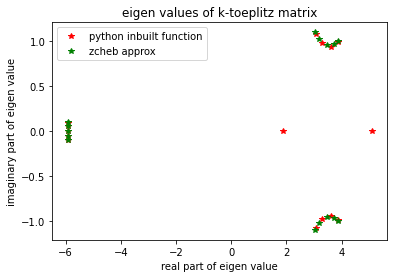

In [5]:
#plotting python inbuilt eigenvalues and chebyshev approximated eigenvalues
t=int(input("number of chains to be repeated= "))

diag_k=np.loadtxt("diag_entries.txt")   #diagonal entries
u_k=np.loadtxt("upper_diag.txt")        #upper diagonal
l_k=(np.loadtxt("lower_diag.txt"))        #lower diagonal
A=k_toeplitz_matrix(diag_k,u_k,l_k,t)
k=len(diag_k)
  
result=sc.eig(A)
e1=result[0]  #eigen values by python inbuilt function

zcheb1=chebeig(diag_k,u_k,l_k,k,t)        #eigen values of the matrix is approximated to chebyshev polynomials
plt.plot(e1.real,e1.imag,"*",color="red",label="python inbuilt function") 
plt.plot(zcheb1.real,zcheb1.imag,"*",color="green",label="zcheb approx")
plt.legend()
plt.title("eigen values of k-toeplitz matrix")
plt.xlabel("real part of eigen value")
plt.ylabel("imaginary part of eigen value")
plt.show()